In [2]:
# Populism analysis 
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


### **Stage 1: Data Cleaning and Variable Creation**

In [3]:
# Import labelled populist data 2017
poptweets19 = pd.read_csv('/content/drive/MyDrive/Diss_data/LBLD_politician_2019_tweets.csv')
poptweets19

,Unnamed: 0,conversation_id,username,create_at,text,retweet_count,reply_count,like_count,hashtags,populist
0,0,1209156155349622787,SKinnock,2019-12-23T16:57:47.000Z,contrary to views of some london based lib lef...,3,3,35,NaN,1
1,1,1208081373224996869,SKinnock,2019-12-20T17:46:59.000Z,i was paired amp slipped today if i d been ...,7,23,37,NaN,0
2,2,1207687004630028288,SKinnock,2019-12-19T15:39:54.000Z,very pleased that after a gruelling 2 1 2 year...,4,1,16,NaN,0
3,3,1207645319804133376,SKinnock,2019-12-19T12:54:15.000Z,choice was always clear soft brexit + real ch...,59,501,237,NaN,1
4,4,1207641465175891969,SKinnock,2019-12-19T12:38:56.000Z,messages about fast paced economic change glo...,2,25,37,#WakeUpAndSmellTheCoffee,1
...,...,...,...,...,...,...,...,...,...,...
260131,260131,1185090605128605696,AnnaPerrett,2019-10-18T07:09:52.000Z,love our nhs boris johnson doesn t care he w...,4,0,3,#ProtectOurNHS,1
260132,260132,1184395982697648128,AnnaPerrett,2019-10-16T09:09:41.000Z,we need some 21st century solutions to transpo...,1,1,5,#York,1
260133,260133,1184161559439912960,AnnaPerrett,2019-10-15T17:38:11.000Z,as the daughter of a postie of 28 years some...,0,0,7,NaN,0
260134,260134,1184006207750713344,AnnaPerrett,2019-10-15T07:20:52.000Z,callous but sadly no longer shocking story of ...,0,0,1,NaN,1


In [4]:
# Sort politicians by who tweeted most populist rhetoric
populistcount = poptweets19.groupby('username')['populist'].sum()
populistcount = populistcount.reset_index()
sorted_popcount = populistcount.sort_values(by='populist', ascending=False)
sorted_popcount

,username,populist
349,CroydonLibDems,796
188,BorisJohnson,682
1213,Richard12545678,656
1140,PaulaBarkerMP,602
1116,OxfordeastB,538
...,...,...
311,CllrAlex,0
666,IpswichGreens,0
1840,jamesblanchard,0
2114,rosie4westlancs,0


In [5]:
# Read in General Election data
analysis_df = pd.read_csv('/content/drive/MyDrive/Diss_data/ge1719tweets_results.csv')

# Subset for 2017
analysis_19 = analysis_df[0:3320]

# Merge with populist tweet data
analysis_19 = pd.merge(analysis_19,
               sorted_popcount,
               on='username',
               how='left')
analysis_19

,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,change,year,populist
0,NaN,Glenda Davies,Aberavon,County,Brexit Party,0,0,0,3108,0,1,0,0,NaN,2019,NaN
1,CharlotteJLang,Charlotte Lang,Aberavon,County,Conservative,0,0,0,6518,0,1,0,0,0.0,2019,5.0
2,NaN,Giorgia Finney,Aberavon,County,Green,0,0,0,450,0,1,0,0,NaN,2019,NaN
3,CaptainBeany,Captain Beany,Aberavon,County,Independent,0,0,0,731,0,0,0,0,NaN,2019,2.0
4,SKinnock,Stephen Kinnock,Aberavon,County,Labour,0,0,0,17008,1,0,1,1,0.0,2019,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,NaN,Andrew Snedden,York Central,Borough,The Yorkshire Party,0,0,0,557,0,0,0,0,NaN,2019,NaN
3316,JulianSturdy,Julian Sturdy,York Outer,County,Conservative,0,0,0,27324,0,0,1,1,0.0,2019,19.0
3317,NaN,Scott Marmion,York Outer,County,Independent,0,0,0,692,0,0,0,0,NaN,2019,NaN
3318,AnnaPerrett,Anna Perrett,York Outer,County,Labour,0,0,0,17339,0,1,0,0,0.0,2019,42.0


In [6]:
# Impute populist missing values with 0
analysis_19.isnull().sum()

username              805
name                    0
constituency_name       0
constituency_type       0
party_name              0
count                   0
retweet                 0
like                    0
votes                   0
share                   0
female                  0
sitting_mp              0
former_mp               0
change                779
year                    0
populist             1074
dtype: int64

In [7]:
del analysis_19['change']

In [8]:
analysis_19['populist'] = analysis_19['populist'].fillna(0)

In [9]:
# Creating 'other' category for party_name variable to merge fringe parties
analysis_19.loc[analysis_19['party_name'].isin((analysis_19['party_name'].value_counts()[analysis_19['party_name'].value_counts() < 40]).index), 'party_name'] = 'Other'

In [10]:
# Creating dummy variable for if a politician has ever tweeted something considered populist
analysis_19.loc[ analysis_19['populist'] == 0, 'populist_dummy'] = 0
analysis_19.loc[ analysis_19['populist'] != 0, 'populist_dummy'] = 1

In [11]:
# Creating log of populist variable to achieve normal distribution
analysis_19['populist_log'] = np.log(analysis_19['populist'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
# Creating a vote share variable for each candidate
analysis_19['voteshare'] = (analysis_19['votes'] / analysis_19.groupby('constituency_name')['votes'].transform('sum')) * 100
analysis_19['voteshare'] = analysis_19['voteshare'].round(2)

In [13]:
# Creating Margin of Victory column for the dataframe:

# df of constituency and voteshares
constit_and_voteshare = analysis_19[['constituency_name', 'voteshare']]

# Group by constit, then sort by voteshare
constit_top2_candidates = constit_and_voteshare.sort_values(['constituency_name', 'voteshare'],ascending=False).groupby('constituency_name').head(2)

# turn back into dataframe
constit_top2_candidates = constit_top2_candidates.reset_index()
print(type(constit_top2_candidates))

# Margin of victory = difference between top two candidates in each constituency
constit_top2_candidates['MoV'] = constit_top2_candidates.groupby('constituency_name')['voteshare'].diff()

# Keep only rows with results in
constit_top2_candidates = constit_top2_candidates.dropna()

# Keep only constituency and MoV cols
constit_top2_candidates = constit_top2_candidates[['constituency_name', 'MoV']]

# Get df back to alphabetical order
constit_top2_candidates = constit_top2_candidates[::-1]               

# Turn values from negative to positive
constit_top2_candidates['MoV'] = abs(constit_top2_candidates['MoV'])
constit_top2_candidates

<class 'pandas.core.frame.DataFrame'>


,constituency_name,MoV
1299,Aberavon,33.20
1297,Aberconwy,6.38
1295,Aberdeen North,33.87
1293,Aberdeen South,8.74
1291,Airdrie and Shotts,13.08
...,...,...
9,Wythenshawe and Sale East,23.23
7,Yeovil,27.31
5,Ynys Mon,5.38
3,York Central,27.36


In [14]:
# Putting MoV values for each constituency back into the dataset
analysis_19 = pd.merge(analysis_19,
               constit_top2_candidates,
               on='constituency_name',
               how='inner')

analysis_19['MoV'] = analysis_19['MoV'].round(2)

In [15]:
analysis_19 = analysis_19.dropna()

In [16]:
# FINAL POLITICIAN LEVEL DF
analysis_19

,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
1,CharlotteJLang,Charlotte Lang,Aberavon,County,Conservative,0,0,0,6518,0,1,0,0,2019,5.0,1.0,1.609438,20.63,33.20
3,CaptainBeany,Captain Beany,Aberavon,County,Independent,0,0,0,731,0,0,0,0,2019,2.0,1.0,0.693147,2.31,33.20
4,SKinnock,Stephen Kinnock,Aberavon,County,Labour,0,0,0,17008,1,0,1,1,2019,41.0,1.0,3.713572,53.83,33.20
5,SheilaKingstonJ,Sheila Kingston-Jones,Aberavon,County,Liberal Democrat,0,0,0,1072,0,1,0,0,2019,2.0,1.0,0.693147,3.39,33.20
6,sanpabloking,Nigel Hunt,Aberavon,County,Other,0,0,0,2711,0,0,0,0,2019,7.0,1.0,1.945910,8.58,33.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,RachaelMaskell,Rachael Maskell,York Central,Borough,Labour and Co-operative,0,0,0,27312,1,1,1,1,2019,49.0,1.0,3.891820,55.17,27.36
3313,jamesblanchard,James Blanchard,York Central,Borough,Liberal Democrat,0,0,0,4149,0,0,0,0,2019,0.0,0.0,-inf,8.38,27.36
3314,AndrewD14920764,Andrew Dunn,York Central,Borough,Other,0,0,0,134,0,0,0,0,2019,3.0,1.0,1.098612,0.27,27.36
3316,JulianSturdy,Julian Sturdy,York Outer,County,Conservative,0,0,0,27324,0,0,1,1,2019,19.0,1.0,2.944439,49.37,18.04


In [17]:
# CREATING A DATAFRAME FOR CONSTITUENCY LEVEL ANALYSIS
constituency_df = analysis_19[['constituency_name', 'constituency_type', 'MoV']]
constituency_df = constituency_df.drop_duplicates()
constituency_df

,constituency_name,constituency_type,MoV
1,Aberavon,County,33.20
7,Aberconwy,County,6.38
11,Aberdeen North,Borough,33.87
17,Aberdeen South,Borough,8.74
22,Airdrie and Shotts,County,13.08
...,...,...,...
3293,Wythenshawe and Sale East,Borough,23.23
3299,Yeovil,County,27.31
3307,Ynys Mon,County,5.38
3309,York Central,Borough,27.36


In [18]:
# Create total populist rhetoric per constituency variable
constit_populism = analysis_19.groupby('constituency_name')['populist'].sum()
constit_populism = constit_populism.reset_index()
constit_populism = constit_populism.sort_values(by='populist', ascending=False)

In [19]:
# Add total populist rhetoric variable to constituency_df
constituency_df = pd.merge(constituency_df,
               constit_populism,
               on='constituency_name',
               how='inner')

In [20]:
# Find the winner of each constituency
constit_party_votes = analysis_19[['constituency_name', 'party_name', 'voteshare']]

# Group by constit, then sort by voteshare
constit_winner = constit_party_votes.sort_values(['constituency_name', 'voteshare'],ascending=False).groupby('constituency_name').head(1)

In [21]:
constituency_df = pd.merge(constituency_df,
               constit_winner,
               on='constituency_name',
               how='inner')

constituency_df['winning_party'] = constituency_df['party_name']
del constituency_df['party_name']

In [22]:
# Log of constituency populist variable
constituency_df['populist_log'] = np.log(constituency_df['populist'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Categorical variable for whether a constituency is competitive
constituency_df['competition'] = 'Moderate'
constituency_df.loc[ constituency_df['MoV'] > 40, 'competition'] = 'Safe'
constituency_df.loc[ constituency_df['MoV'] < 10, 'competition'] = 'Competitive'


In [24]:
# FINAL CONSTITUENCY LEVEL DF
constituency_df

,constituency_name,constituency_type,MoV,populist,voteshare,winning_party,populist_log,competition
0,Aberavon,County,33.20,57.0,53.83,Labour,4.043051,Moderate
1,Aberconwy,County,6.38,23.0,46.09,Conservative,3.135494,Competitive
2,Aberdeen North,Borough,33.87,326.0,54.01,Scottish National Party,5.786897,Moderate
3,Aberdeen South,Borough,8.74,53.0,44.67,Scottish National Party,3.970292,Competitive
4,Airdrie and Shotts,County,13.08,15.0,45.08,Scottish National Party,2.708050,Moderate
...,...,...,...,...,...,...,...,...
644,Wythenshawe and Sale East,Borough,23.23,54.0,53.30,Labour,3.988984,Moderate
645,Yeovil,County,27.31,102.0,58.37,Conservative,4.624973,Moderate
646,Ynys Mon,County,5.38,47.0,30.07,Labour,3.850148,Competitive
647,York Central,Borough,27.36,187.0,55.17,Labour and Co-operative,5.231109,Moderate


### **Stage 2: Descriptive Statistics**

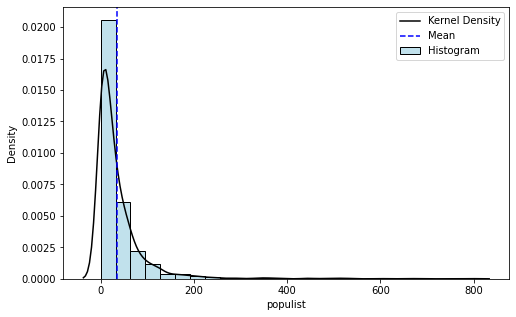

In [25]:
# EDA OF POPULIST VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( analysis_19['populist'], color="black", label="Kernel Density")
sns.histplot( analysis_19['populist'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(analysis_19['populist'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

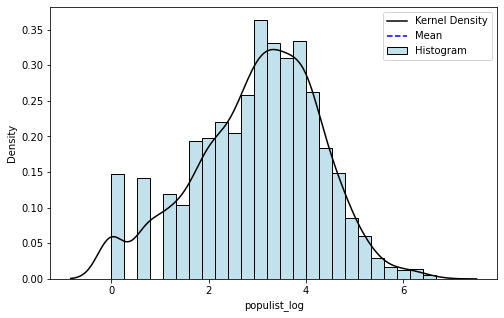

In [26]:
# EDA OF POPULIST LOG VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( analysis_19['populist_log'], color="black", label="Kernel Density")
sns.histplot( analysis_19['populist_log'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(analysis_19['populist_log'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

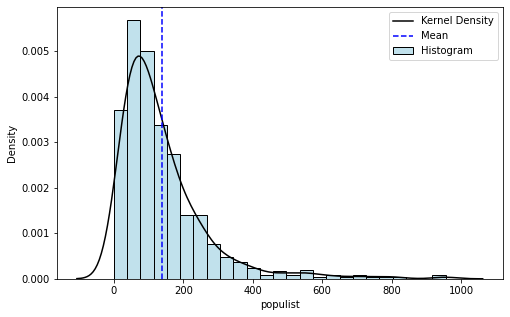

In [27]:
# EDA OF POPULIST VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( constituency_df['populist'], color="black", label="Kernel Density")
sns.histplot( constituency_df['populist'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(constituency_df['populist'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

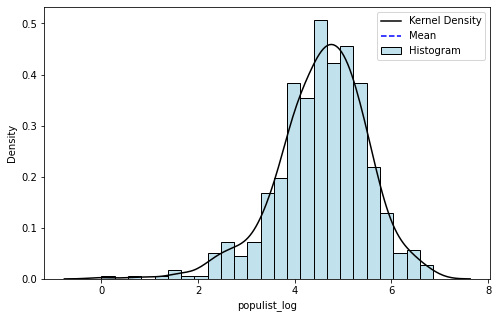

In [28]:
# EDA OF POPULIST LOG VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( constituency_df['populist_log'], color="black", label="Kernel Density")
sns.histplot( constituency_df['populist_log'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline( constituency_df['populist_log'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

In [29]:
# How many tweets were detected as populist?
print(analysis_19['populist_dummy'].value_counts(normalize=True))

# Roughly 17% of tweets by politicians in 2017 classified as populist by our model 

1.0    0.859642
0.0    0.140358
Name: populist_dummy, dtype: float64


In [30]:
# Initial look at final df
analysis_19.describe(include='all')

,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
count,2515,2515,2515,2515,2515,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.0,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
unique,2511,2507,649,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BromleyGreens,James Baker,Uxbridge and South Ruislip,County,Conservative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,2,8,1356,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.503380,68.491849,210.735984,11052.257654,0.150298,0.360239,0.205567,0.218290,2019.0,35.796421,0.859642,-inf,22.350414,24.622370
std,NaN,NaN,NaN,NaN,NaN,10.556864,1105.102204,3313.367989,10740.967614,0.357435,0.480165,0.404195,0.413168,0.0,59.734788,0.347427,NaN,21.055217,15.827729
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,-inf,0.010000,0.110000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1873.500000,0.000000,0.000000,0.000000,0.000000,2019.0,4.000000,1.000000,1.386294,4.000000,11.050000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,6702.000000,0.000000,0.000000,0.000000,0.000000,2019.0,18.000000,1.000000,2.890372,13.570000,23.540000
75%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18403.500000,0.000000,1.000000,0.000000,0.000000,2019.0,45.000000,1.000000,3.806662,40.300000,36.220000


In [31]:
constituency_df.describe(include='all')

,constituency_name,constituency_type,MoV,populist,voteshare,winning_party,populist_log,competition
count,649,649,649.000000,649.000000,649.000000,649,649.000000,649
unique,649,2,NaN,NaN,NaN,8,NaN,3
top,Aberavon,County,NaN,NaN,NaN,Conservative,NaN,Moderate
freq,1,367,NaN,NaN,NaN,321,NaN,383
mean,NaN,NaN,24.881757,138.718028,51.444391,NaN,-inf,NaN
std,NaN,NaN,15.991190,129.626549,12.466556,NaN,NaN,NaN
min,NaN,NaN,0.110000,0.000000,3.830000,NaN,-inf,NaN
25%,NaN,NaN,11.210000,56.000000,46.000000,NaN,4.025352,NaN
50%,NaN,NaN,23.690000,103.000000,52.140000,NaN,4.634729,NaN
75%,NaN,NaN,36.340000,176.000000,59.350000,NaN,5.170484,NaN


In [32]:
# How many politicians in our dataset have Twitter? 
2515/3320

# 76% of politicians in our dataset are on twitter in 2019.

0.7575301204819277

In [33]:
# How many politicians in our dataset had at least one tweet detected as populist by our model? 
print(analysis_19['populist_dummy'].value_counts(normalize=True))

1.0    0.859642
0.0    0.140358
Name: populist_dummy, dtype: float64


In [34]:
# How many politicians in our dataset are affiliated to each party?
print(analysis_19['party_name'].value_counts())

# Lots of tory, lib dem and labour candidates as expected
# Less UKIP, traditionally populist party, keep in mind

Conservative               516
Liberal Democrat           511
Labour                     509
Green                      363
Other                      209
Brexit Party               183
Independent                107
Scottish National Party     57
Labour and Co-operative     47
UK Independence Party       13
Name: party_name, dtype: int64


In [35]:
# What proportion of each party's affiliated members tweeted something flagged as populist at least once? 
print(analysis_19.groupby('party_name')['populist_dummy'].value_counts(normalize=True))

party_name               populist_dummy
Brexit Party             1.0               0.825137
                         0.0               0.174863
Conservative             1.0               0.844961
                         0.0               0.155039
Green                    1.0               0.845730
                         0.0               0.154270
Independent              1.0               0.775701
                         0.0               0.224299
Labour                   1.0               0.915521
                         0.0               0.084479
Labour and Co-operative  1.0               0.957447
                         0.0               0.042553
Liberal Democrat         1.0               0.857143
                         0.0               0.142857
Other                    1.0               0.813397
                         0.0               0.186603
Scottish National Party  1.0               0.982456
                         0.0               0.017544
UK Independence Party   

In [36]:
# Which parties had the largest total number of populist tweets affiliated to them?
pop_by_party = analysis_19.groupby('party_name')['populist'].sum()
pop_by_party = pop_by_party.reset_index()
pop_by_party = pop_by_party.sort_values(by='populist', ascending=False)

pop_by_party

,party_name,populist
4,Labour,25917.0
6,Liberal Democrat,19633.0
1,Conservative,11880.0
2,Green,10617.0
0,Brexit Party,7628.0
7,Other,4364.0
3,Independent,4061.0
5,Labour and Co-operative,3224.0
8,Scottish National Party,2470.0
9,UK Independence Party,234.0


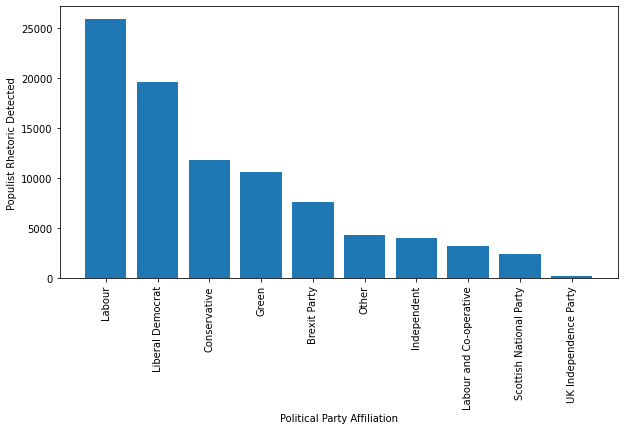

In [37]:
parties = list(pop_by_party['party_name'])
populist_vals = list(pop_by_party['populist'])

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(parties, populist_vals)
 
plt.xlabel("Political Party Affiliation")
plt.ylabel("Populist Rhetoric Detected")

plt.yticks(np.arange(0, 30000, 5000)) 

plt.xticks(ticks=range(len(populist_vals)), labels=parties, rotation=90)
plt.show()

# Labour clearly in front #forthemanynotthefew a major factor? 
# LibDem and Green in front of Conservative -> Is this because of the different types of voters these parties are trying to reach? 

In [38]:
# Which constituencies had the highest levels of populist rhetoric tweeted by political candidates?  
constit_by_party = analysis_19.groupby('constituency_name')['populist'].sum()
constit_by_party = constit_by_party.reset_index()
constit_by_party = constit_by_party.sort_values(by='populist', ascending=False)
constit_by_party
# Save to csv to make maps 
constit_by_party.to_csv('constit_by_party19.csv')
!cp constit_by_party19.csv "drive/My Drive/Diss_data"

In [39]:
# Competitive or Safe
pop_by_competition = constituency_df.groupby('competition')['populist'].sum()
pop_by_competition = pop_by_competition.reset_index()
pop_by_competition = pop_by_competition.sort_values(by='populist', ascending=False)

pop_by_competition

,competition,populist
1,Moderate,52084.0
0,Competitive,20142.0
2,Safe,17802.0


In [40]:
# Gender
print(analysis_19['female'].value_counts(normalize=True))

print(analysis_19.groupby('female')['populist_dummy'].value_counts(normalize=True))

0    0.639761
1    0.360239
Name: female, dtype: float64
female  populist_dummy
0       1.0               0.848975
        0.0               0.151025
1       1.0               0.878587
        0.0               0.121413
Name: populist_dummy, dtype: float64


In [41]:
# Sitting
print(analysis_19['sitting_mp'].value_counts(normalize=True))

print(analysis_19.groupby('sitting_mp')['populist_dummy'].value_counts(normalize=True))

0    0.794433
1    0.205567
Name: sitting_mp, dtype: float64
sitting_mp  populist_dummy
0           1.0               0.836837
            0.0               0.163163
1           1.0               0.947776
            0.0               0.052224
Name: populist_dummy, dtype: float64


In [42]:
# Former
print(analysis_19['former_mp'].value_counts(normalize=True))

print(analysis_19.groupby('former_mp')['populist_dummy'].value_counts(normalize=True))

0    0.78171
1    0.21829
Name: former_mp, dtype: float64
former_mp  populist_dummy
0          1.0               0.837233
           0.0               0.162767
1          1.0               0.939891
           0.0               0.060109
Name: populist_dummy, dtype: float64


### **Stage 3: Bivariate and Multivariate Analyses**

In [51]:
# Correlations of all variables in politician level df
analysis_19.corr()

,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
count,1.000000,0.527646,0.492937,0.019781,-0.019320,0.043390,-0.024540,-0.004592,NaN,0.162463,0.051590,0.160336,0.011857,0.008045
retweet,0.527646,1.000000,0.986508,0.053601,-0.010476,0.051628,0.028575,0.038022,NaN,0.121355,0.021301,0.081363,0.048293,-0.038996
like,0.492937,0.986508,1.000000,0.060085,-0.001348,0.052263,0.037898,0.047170,NaN,0.120039,0.022916,0.081373,0.055742,-0.035002
votes,0.019781,0.053601,0.060085,1.000000,0.739941,0.052550,0.697643,0.701678,NaN,0.084356,0.154613,0.087962,0.974729,0.042719
share,-0.019320,-0.010476,-0.001348,0.739941,1.000000,-0.021253,0.636817,0.618114,NaN,0.038153,0.099474,0.005135,0.733581,0.220594
female,0.043390,0.051628,0.052263,0.052550,-0.021253,1.000000,-0.018944,-0.017586,NaN,0.046797,0.040927,0.106966,0.052718,0.012043
sitting_mp,-0.024540,0.028575,0.037898,0.697643,0.636817,-0.018944,1.000000,0.962616,NaN,0.082427,0.129066,0.063409,0.723158,0.001319
former_mp,-0.004592,0.038022,0.047170,0.701678,0.618114,-0.017586,0.962616,1.000000,NaN,0.081258,0.122083,0.062831,0.726898,-0.021724
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
populist,0.162463,0.121355,0.120039,0.084356,0.038153,0.046797,0.082427,0.081258,NaN,1.000000,0.242191,0.699328,0.083699,0.002896


In [52]:
# Correlations of constituency_df
constituency_df.corr()

,MoV,populist,voteshare,populist_log
MoV,1.000000,-0.012260,0.477400,-0.043917
populist,-0.012260,1.000000,0.115574,0.815151
voteshare,0.477400,0.115574,1.000000,0.157360
populist_log,-0.043917,0.815151,0.157360,1.000000


In [53]:
# Linear regression in python! Just to see what comes up
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
# Making sure types are correct for regression modelling
analysis_19.dtypes

username              object
name                  object
constituency_name     object
constituency_type     object
party_name            object
count                  int64
retweet                int64
like                   int64
votes                  int64
share                  int64
female                 int64
sitting_mp             int64
former_mp              int64
year                   int64
populist             float64
populist_dummy       float64
populist_log         float64
voteshare            float64
MoV                  float64
dtype: object

In [55]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('populist ~ constituency_type+party_name+retweet+like+female+sitting_mp+former_mp+MoV+voteshare', 
                 data=analysis_19, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,16.194850,Intercept
1,1.033768,constituency_type[T.County]
2,4.786532,party_name[T.Conservative]
3,2.635774,party_name[T.Green]
4,1.545988,party_name[T.Independent]
5,4.015734,party_name[T.Labour]
6,1.416952,party_name[T.Labour and Co-operative]
7,3.161632,party_name[T.Liberal Democrat]
8,2.023400,party_name[T.Other]
9,1.537842,party_name[T.Scottish National Party]


In [56]:
# Individual DF Linear Regression
X = analysis_19[['constituency_type', 'party_name', 'retweet', 'female', 
                  'sitting_mp', 'MoV']]

y = analysis_19['populist']

X = pd.get_dummies(data=X, drop_first=True)

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

# with statsmodels
X_train = sm.add_constant(X_train) 

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               populist   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.140
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.08e-19
Time:                        09:54:29   Log-Likelihood:                -9574.4
No. Observations:                1760   AIC:                         1.918e+04
Df Residuals:                    1745   BIC:                         1.926e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
constituency_df.dtypes

constituency_name     object
constituency_type     object
MoV                  float64
populist             float64
voteshare            float64
winning_party         object
populist_log         float64
competition           object
dtype: object

In [58]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('populist ~ constituency_type+MoV+winning_party+competition', 
                 data=constituency_df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,333.068475,Intercept
1,1.212813,constituency_type[T.County]
2,82.655407,winning_party[T.Conservative]
3,2.026806,winning_party[T.Green]
4,70.603255,winning_party[T.Labour]
5,14.523764,winning_party[T.Labour and Co-operative]
6,14.503640,winning_party[T.Liberal Democrat]
7,11.714143,winning_party[T.Other]
8,22.893170,winning_party[T.Scottish National Party]
9,3.005831,competition[T.Moderate]


In [59]:
# Model 2
# What is the relationship between a Constituency's MoV and the amount of populism within it? 

# Feature Variables
X2 = constituency_df['MoV']

y2 = constituency_df['populist']

#X2 = pd.get_dummies(data=X2, drop_first=True)

# Train / test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=101)

# with statsmodels
X_train2 = sm.add_constant(X_train2) 

model2 = sm.OLS(y_train2, X_train2).fit()
predictions2 = model2.predict(X_train2) 
 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:               populist   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2209
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.639
Time:                        09:54:30   Log-Likelihood:                -2876.4
No. Observations:                 454   AIC:                             5757.
Df Residuals:                     452   BIC:                             5765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.3001     12.201     12.155      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
